In [1]:
import pandas as pd
import seaborn as sns
from sklearn import tree
import numpy as np
import glob, os
import matplotlib.pyplot as plt


# PERCENTAGES is the percentages of the top score parameters

In [2]:
PERCENTAGES = 0.5
ASCEND = False

In [3]:
performance = "ap"

# Listing the paramters result files

In [4]:
files = glob.glob("F:/ws/pyws/scDEAL/saved/parameters/REP/rep*GSE*"+str(performance)+"*.txt")

In [5]:
files

['F:/ws/pyws/scDEAL/saved/parameters/REP\\rep_dataGSE110894_ap_score_ori.txt',
 'F:/ws/pyws/scDEAL/saved/parameters/REP\\rep_dataGSE112274_ap_score_ori.txt',
 'F:/ws/pyws/scDEAL/saved/parameters/REP\\rep_dataGSE117872_HN120_ap_score_ori.txt',
 'F:/ws/pyws/scDEAL/saved/parameters/REP\\rep_dataGSE117872_HN137_ap_score_ori.txt',
 'F:/ws/pyws/scDEAL/saved/parameters/REP\\rep_dataGSE140440_ap_score_ori.txt',
 'F:/ws/pyws/scDEAL/saved/parameters/REP\\rep_dataGSE149383_ap_score_ori.txt']

In [6]:
gene = {"GSE110894":21182,"GSE112274":26982,"GSE117872":18120,"GSE140440":32197,"GSE149383":18380}
cell = {"GSE110894":1419,"GSE112274":507,"GSE117872":1302,"GSE140440":324,"GSE149383":2730}
drop = {"GSE110894":73.17,"GSE112274":71.27,"GSE117872":59.33,"GSE140440":64.22,"GSE149383":94.26}


In [7]:
def apply_sum(r,colname):
    nums = r[colname].split(",")
    return int(nums[0]) + int(nums[1])

def apply_sum_col(r,columns):
    s = 0
    for c in columns:
        s = int(r[c])+s
    return s

def apply_split_val(r,colname,sep="_bottle_",ind=1):
    return r[colname].split(",")[ind]

In [8]:
# files = [files[2]]
# f = files[0]

In [9]:
df_all = pd.DataFrame([])
# Read an process all files
for f in files:
    
    print(f)
    df_score = pd.read_csv(files[0],header=None,sep="\t")

    df_param = pd.read_csv(f,header=None,sep="_")

    if(f.find("117872")>0):
        df_param.loc[:,2] = df_param.loc[:,2]+df_param.loc[:,3]
        df_param = df_param.drop(columns=[3])

    col_names = df_param.loc[1,1::2].values
    df_param_vals = df_param.loc[:,0::2]

    df_v = df_param_vals.iloc[:,:-1]

    df_s = df_param_vals.iloc[:,-1].str.split("\t", expand = True)
    df_s

    df_concat = pd.concat([df_v, df_s], axis=1)

    col_names = ["bulk_data"]+list(col_names)+["score"]

    df_concat.columns = col_names
    
    df_concat["all_p"] = df_score.iloc[:,0]

    df_param_vals = df_concat.dropna()    
    # Order by score
    df_param_vals.sort_values("score",inplace=True,ascending=ASCEND)   
    

    # Append the df to the main file
    if(len(df_all)==0):
        df_all = df_param_vals.head(int(len(df_param_vals)*PERCENTAGES))
    else:
        df_all = pd.concat([df_all, df_param_vals.head(int(len(df_param_vals)*PERCENTAGES))])

F:/ws/pyws/scDEAL/saved/parameters/REP\rep_dataGSE110894_ap_score_ori.txt
F:/ws/pyws/scDEAL/saved/parameters/REP\rep_dataGSE112274_ap_score_ori.txt
F:/ws/pyws/scDEAL/saved/parameters/REP\rep_dataGSE117872_HN120_ap_score_ori.txt
F:/ws/pyws/scDEAL/saved/parameters/REP\rep_dataGSE117872_HN137_ap_score_ori.txt
F:/ws/pyws/scDEAL/saved/parameters/REP\rep_dataGSE140440_ap_score_ori.txt
F:/ws/pyws/scDEAL/saved/parameters/REP\rep_dataGSE149383_ap_score_ori.txt


In [10]:
df_all

,bulk_data,data,drug,bottle,edim,pdim,model,dropout,gene,lr,mod,sam,transfer,score,all_p
10,integrate,GSE110894,I.BET.762,128,"512,256","256,128",DAE,0.1,F,0.01,ori,downsampling,after,0.9803056200469292,integrate_data_GSE110894_drug_I.BET.762_bottle...
152,integrate,GSE110894,I.BET.762,128,"512,256","256,128",DAE,0.1,F,0.01,new,downsampling,after,0.9792050187332074,integrate_data_GSE110894_drug_I.BET.762_bottle...
132,integrate,GSE110894,I.BET.762,128,"512,256","256,128",DAE,0.1,F,0.01,new,downsampling,after,0.9792050187332074,integrate_data_GSE110894_drug_I.BET.762_bottle...
40,integrate,GSE110894,I.BET.762,128,"512,256","256,128",DAE,0.1,F,0.01,new,downsampling,after,0.9774959705554164,integrate_data_GSE110894_drug_I.BET.762_bottle...
64,integrate,GSE110894,I.BET.762,128,"512,256","256,128",DAE,0.1,F,0.01,new,downsampling,after,0.9774959705554164,integrate_data_GSE110894_drug_I.BET.762_bottle...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,integrate,GSE149383,ERLOTINIB,512,"512,256","256,128",DAE,0.3,F,0.10,new,SMOTE,after,0.6859996145566325,old_data_GSE110894_drug_I.BET.762_bottle_128_e...
65,integrate,GSE149383,ERLOTINIB,512,"512,256","256,128",DAE,0.3,F,0.10,ori,SMOTE,before,0.6859589656798223,integrate_data_GSE110894_drug_I.BET.762_bottle...
51,integrate,GSE149383,ERLOTINIB,512,"512,256","256,128",DAE,0.3,F,0.10,new,SMOTE,before,0.6859589656798223,integrate_data_GSE110894_drug_I.BET.762_bottle...
124,integrate,GSE149383,ERLOTINIB,512,"512,256","256,128",DAE,0.3,F,0.10,ori,SMOTE,after,0.6745265909855902,integrate_data_GSE110894_drug_I.BET.762_bottle...


In [72]:
df_all["score"] = pd.to_numeric(df_all["score"])


In [73]:
df_all[df_all.score > df_all.score.quantile(.05)]

,bulk_data,data,drug,bottle,edim,pdim,model,dropout,gene,lr,mod,sam,transfer,score,all_p
10,integrate,GSE110894,I.BET.762,128,"512,256","256,128",DAE,0.1,F,0.01,ori,downsampling,after,0.980306,integrate_data_GSE110894_drug_I.BET.762_bottle...
152,integrate,GSE110894,I.BET.762,128,"512,256","256,128",DAE,0.1,F,0.01,new,downsampling,after,0.979205,integrate_data_GSE110894_drug_I.BET.762_bottle...
132,integrate,GSE110894,I.BET.762,128,"512,256","256,128",DAE,0.1,F,0.01,new,downsampling,after,0.979205,integrate_data_GSE110894_drug_I.BET.762_bottle...
40,integrate,GSE110894,I.BET.762,128,"512,256","256,128",DAE,0.1,F,0.01,new,downsampling,after,0.977496,integrate_data_GSE110894_drug_I.BET.762_bottle...
64,integrate,GSE110894,I.BET.762,128,"512,256","256,128",DAE,0.1,F,0.01,new,downsampling,after,0.977496,integrate_data_GSE110894_drug_I.BET.762_bottle...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,integrate,GSE149383,ERLOTINIB,512,"512,256","256,128",DAE,0.3,F,0.10,new,SMOTE,after,0.686000,old_data_GSE110894_drug_I.BET.762_bottle_128_e...
65,integrate,GSE149383,ERLOTINIB,512,"512,256","256,128",DAE,0.3,F,0.10,ori,SMOTE,before,0.685959,integrate_data_GSE110894_drug_I.BET.762_bottle...
51,integrate,GSE149383,ERLOTINIB,512,"512,256","256,128",DAE,0.3,F,0.10,new,SMOTE,before,0.685959,integrate_data_GSE110894_drug_I.BET.762_bottle...
124,integrate,GSE149383,ERLOTINIB,512,"512,256","256,128",DAE,0.3,F,0.10,ori,SMOTE,after,0.674527,integrate_data_GSE110894_drug_I.BET.762_bottle...


In [74]:
    # df_all = pd.DataFrame([])
# # Read an process all files
# for f in files:
    
#     print(f)
#     df_score = pd.read_csv(f,header=None,sep="\t")
#     df_score.columns=["Param","score"]
#     df_param = pd.read_csv(f,header=None,sep="_")
    
#     # If the file have an extra flag of HN120
#     if(f.find("117872")>0):
#         df_param.loc[:,2] = df_param.loc[:,2]+df_param.loc[:,3]
#         df_param = df_param.drop(columns=[3])

    
#     # Get column names as
#     col_names = df_param.loc[1,1::2].values
#     df_param_vals = df_param.loc[0,0::2]
    
#     #sams = [ r.split("\t")[0] for r in df_param_vals.iloc[:,-1].values]
    
#     sams = df_param_vals.iloc[:,-1].str.split("\t", n = 1, expand = True).iloc[:,0].values
#     df_param_vals.iloc[:,-1] = sams
#     df_param_vals.columns= list(col_names)
    
    
#     # Add other demos
        
# #     df_param_vals["p_parms"] = df_param_vals.apply(apply_sum,colname="edim",axis=1)
# #     df_param_vals["e_parms"] = df_param_vals.apply(apply_sum,colname="pdim",axis=1)
# #     df_param_vals["n_parms"] = df_param_vals.apply(apply_sum_col,columns=["e_parms","p_parms","bottle"],axis=1)

    
#     gse = f[31:40]
#     df_param_vals["genes"] = gene[gse]
#     df_param_vals["cells"] = cell[gse]
#     df_param_vals["pct_drop"] = drop[gse]
    
    
#     df_param_vals["all_p"] = df_param_vals["bottle"].astype(str)+df_param_vals["edim"]+df_param_vals["pdim"]+\
#     df_param_vals["dropout"].astype(str)+df_param_vals["lr"].astype(str)+\
#     df_param_vals["sam"]
    
#     df_param_vals["params"] = df_score.Param


    
#     df_param_vals["score"] =  df_score.score
    
#     # Order by score
#     df_param_vals.sort_values("score",inplace=True,ascending=ASCEND)   
    

#     # Append the df to the main file
#     if(len(df_all)==0):
#         df_all = df_param_vals.head(int(len(df_param_vals)*PERCENTAGES))
#     else:
#         df_all = pd.concat([df_all, df_param_vals.head(int(len(df_param_vals)*PERCENTAGES))])

In [75]:
# df = df_all[["all_p","data","score"]]\
# .groupby(["data"])\
# .aggregate(['max','count'])\
# .reset_index()
# df

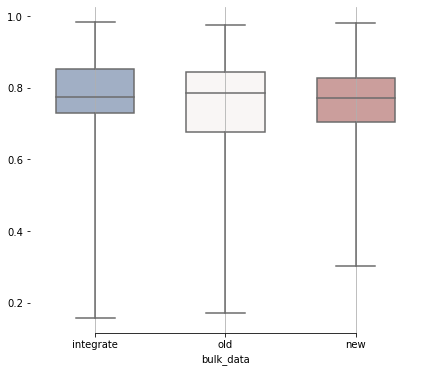

In [76]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
#ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="bulk_data", y="score", data=df_all,
            whis=[0, 100], width=.6, palette="vlag")

# # Add in points to show each observation
# sns.stripplot(x="mod", y="score", data=df_all,
#               size=4, color=".3", linewidth=0)
  
# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

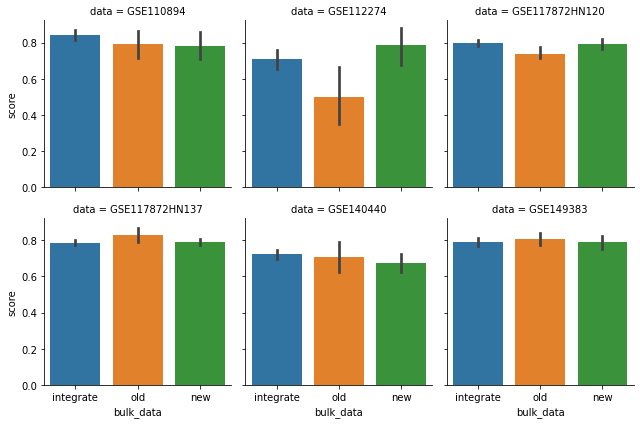

In [77]:
g = sns.catplot(x="bulk_data", y="score",
                #hue="1214data", 
                col="data",height=3, aspect=1,col_wrap=3, 
                data=df_all, kind="bar");

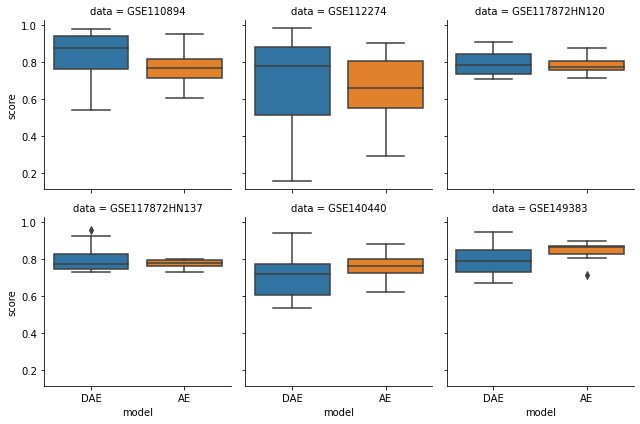

In [78]:
g = sns.catplot(x="model", y="score",
                #hue="1214data", 
                col="data",height=3, aspect=1,col_wrap=3, 
                data=df_all, kind="box");

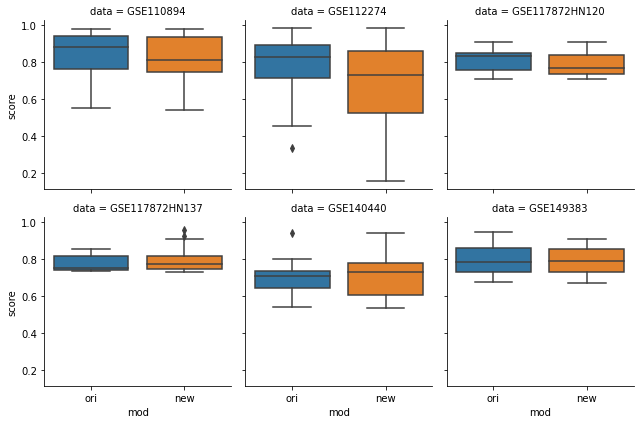

In [79]:
g = sns.catplot(x="mod", y="score",
                #hue="1214data", 
                col="data",height=3, aspect=1,col_wrap=3, 
                data=df_all, kind="box");

In [88]:
list(medians)

[0.85,
 0.76,
 0.81,
 0.77,
 0.82,
 0.35,
 0.78,
 0.8,
 0.72,
 0.76,
 0.78,
 0.8,
 0.72,
 0.66,
 0.76,
 0.79,
 0.78,
 0.8]

In [85]:
df_all["score"] = np.around(df_all["score"], decimals=4)

In [86]:
df_all["score"]

10     0.98
152    0.98
132    0.98
40     0.98
64     0.98
       ... 
126    0.69
65     0.69
51     0.69
124    0.67
74     0.67
Name: score, Length: 500, dtype: float64

In [103]:
sns.set(rc={'figure.figsize':(15,9)})
sns.set_theme(style="ticks")

for p in ["mod","transfer","model","bulk_data"]:
#     g = sns.catplot(x=p, y="score",
#                 #hue="1214data", 
#                 col="data",height=3, aspect=1,col_wrap=3, 
#                 data=df_all, kind="bar");
    

    g = sns.barplot(x="data", y="score", hue=p, data=df_all)
    #g.set_xticklabels(rotation=45)
    g.set_xticklabels(g.get_xticklabels(),rotation=30)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
    medians = df_all.groupby(['data',p])['score'].median()
    vertical_offset = df_all['score'].median() * 0.05 # offset from median for display
    medians = np.around(medians, decimals=2)

#     for container in g.containers:
#         g.bar_label(container,labels=list(medians))    
    #plt.show()
    #plt.figure(figsize=(15,8))
    plt.savefig("saved/figures/params/rep_"+p+str(PERCENTAGES)+performance+"_parpm_bar.tiff")
    
    plt.clf()

<Figure size 1080x648 with 0 Axes>

In [55]:
# df_score = df_score.sort_values("score",ascending=False)

In [56]:
df_score = df_all

In [57]:
df_all.columns

Index(['bulk_data', 'data', 'drug', 'bottle', 'edim', 'pdim', 'model',
       'dropout', 'gene', 'lr', 'mod', 'sam', 'transfer', 'score', 'all_p'],
      dtype='object')

In [58]:
select_params = ['bottle', 'dropout', 'lr', 'p_parms', 'e_parms', 'n_parms']

In [59]:
select_params

['bottle', 'dropout', 'lr', 'p_parms', 'e_parms', 'n_parms']

In [60]:
df_all

,bulk_data,data,drug,bottle,edim,pdim,model,dropout,gene,lr,mod,sam,transfer,score,all_p
10,integrate,GSE110894,I.BET.762,128,"512,256","256,128",DAE,0.1,F,0.01,ori,downsampling,after,0.980306,integrate_data_GSE110894_drug_I.BET.762_bottle...
152,integrate,GSE110894,I.BET.762,128,"512,256","256,128",DAE,0.1,F,0.01,new,downsampling,after,0.979205,integrate_data_GSE110894_drug_I.BET.762_bottle...
132,integrate,GSE110894,I.BET.762,128,"512,256","256,128",DAE,0.1,F,0.01,new,downsampling,after,0.979205,integrate_data_GSE110894_drug_I.BET.762_bottle...
40,integrate,GSE110894,I.BET.762,128,"512,256","256,128",DAE,0.1,F,0.01,new,downsampling,after,0.977496,integrate_data_GSE110894_drug_I.BET.762_bottle...
64,integrate,GSE110894,I.BET.762,128,"512,256","256,128",DAE,0.1,F,0.01,new,downsampling,after,0.977496,integrate_data_GSE110894_drug_I.BET.762_bottle...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,integrate,GSE149383,ERLOTINIB,512,"512,256","256,128",DAE,0.3,F,0.10,new,SMOTE,after,0.686000,old_data_GSE110894_drug_I.BET.762_bottle_128_e...
65,integrate,GSE149383,ERLOTINIB,512,"512,256","256,128",DAE,0.3,F,0.10,ori,SMOTE,before,0.685959,integrate_data_GSE110894_drug_I.BET.762_bottle...
51,integrate,GSE149383,ERLOTINIB,512,"512,256","256,128",DAE,0.3,F,0.10,new,SMOTE,before,0.685959,integrate_data_GSE110894_drug_I.BET.762_bottle...
124,integrate,GSE149383,ERLOTINIB,512,"512,256","256,128",DAE,0.3,F,0.10,ori,SMOTE,after,0.674527,integrate_data_GSE110894_drug_I.BET.762_bottle...


In [61]:
df_all.corr()

,bottle,dropout,lr,score
bottle,1.000000,0.410374,-0.380646,-0.055012
dropout,0.410374,1.000000,0.347490,0.055737
lr,-0.380646,0.347490,1.000000,0.067286
score,-0.055012,0.055737,0.067286,1.000000


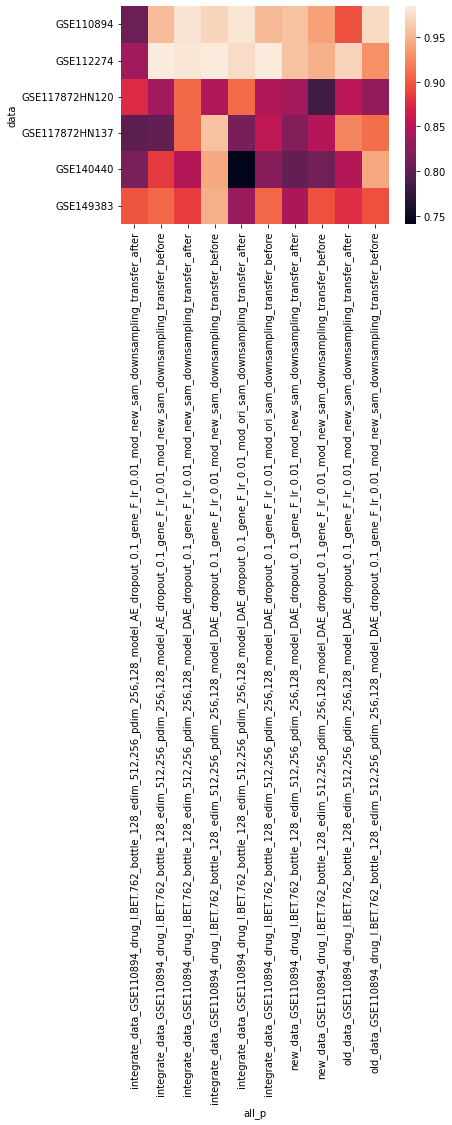

In [62]:
table = pd.pivot_table(df_all, values='score', index=["data"],
                    columns=["all_p"], aggfunc=np.max)

table=table.fillna(0)
ax = sns.heatmap(table)


In [63]:
for p1 in select_params:
    for p2 in select_params:
        if(p1!=p2):
            table = pd.pivot_table(df_score, values='score', index=[p1],
                                columns=[p2], aggfunc=np.max)
            
            table=table.fillna(0)
            ax = sns.heatmap(table)
            plt.savefig("saved/figures/param_ascend_"+str(ASCEND)+p1+p2+".pdf")
            plt.clf()

KeyError: 'p_parms'

<Figure size 432x288 with 0 Axes>

In [ ]:
set(df_score.iloc[:,0])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

for data in set(df_score.iloc[:,0]):
    
    df_select = df_score.loc[df_score.iloc[:,0]==data,:]
    
    X = df_select.loc[:,select_params].values
    # y = 1 * x_0 + 2 * x_1 + 3
    y = df_select.loc[:,"score"].values

    reg = RandomForestRegressor().fit(X, y)
    print(data)
    print(reg.score(X, y))

    print(reg.feature_importances_)
print(df_select.loc[:,select_params].columns)

In [ ]:
reg.estimators_[0].predict(X[0].reshape(1,-1))

In [ ]:
text_representation  = tree.export_text(reg.estimators_[0])
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)